# Load Libaries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [11]:
df=pd.read_csv('E:\Internship\Customer-Churn-Prediction-Project\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\www58\AppData\Local\Temp\ipykernel_19208\593122412.py:1: SyntaxWarning: invalid escape sequence '\I'
  df=pd.read_csv('E:\Internship\Customer-Churn-Prediction-Project\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset basic Information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Observations
* 7043 rows & 21 columns
* No missing values 
* Categorical & numerical features
* Target variable: Churn (Yes/No)

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe(exclude='object')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# Unique Catagotical variables attributs
for col in df.columns:
	if df[col].dtypes=='object':
		print(f'Col: {col}')
		print(f'No of unique values: {df[col].nunique()}')
		print(f'No Of categorics unique value: {df[col].value_counts()} ')
		print('*'*40)

Col: customerID
No of unique values: 7043
No Of categorics unique value: customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64 
****************************************
Col: gender
No of unique values: 2
No Of categorics unique value: gender
Male      3555
Female    3488
Name: count, dtype: int64 
****************************************
Col: Partner
No of unique values: 2
No Of categorics unique value: Partner
No     3641
Yes    3402
Name: count, dtype: int64 
****************************************
Col: Dependents
No of unique values: 2
No Of categorics unique value: Dependents
No     4933
Yes    2110
Name: count, dtype: int64 
****************************************
Col: PhoneService
No of unique values: 2
No Of categorics unique value: PhoneService
Yes    6361
No      682
Name: count, dtype: int64 
***********

In [16]:
df.drop('customerID',axis=1,inplace=True)

In [19]:
# Check for duplicates
df.duplicated().sum()


np.int64(22)

In [20]:
# Convert 'TotalCharges' to numeric (some values might be empty spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

<Axes: >

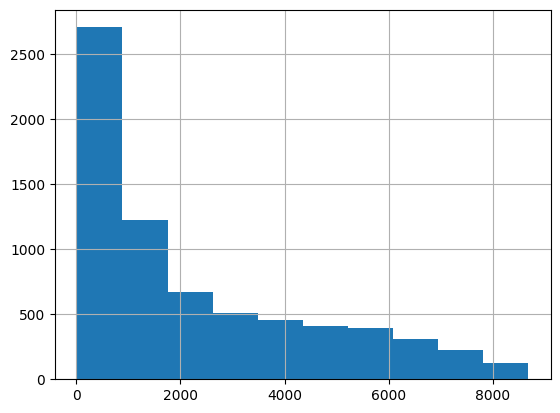

In [21]:
df['TotalCharges'].hist()

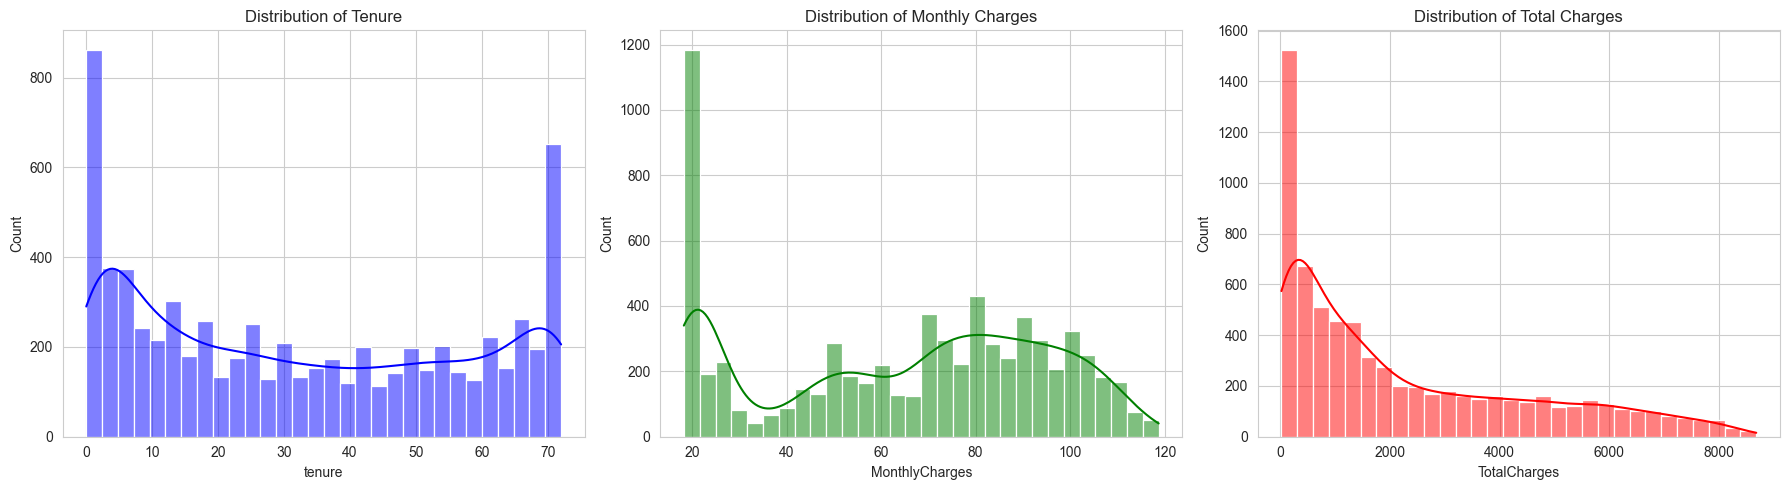

In [22]:
# Set visualization style
sns.set_style("whitegrid")

# Plot distributions for numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["tenure"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Tenure")

sns.histplot(df["MonthlyCharges"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Monthly Charges")

sns.histplot(df["TotalCharges"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribution of Total Charges")

plt.tight_layout()
plt.show()


Numerical Feature Insights
* Tenure: Most customers are either new (low tenure) or long-term (high tenure).
* Monthly Charges: Right-skewed, meaning more customers pay lower charges.
* Total Charges: Similar to tenure—longer tenure leads to higher total charges.

C:\Users\www58\AppData\Local\Temp\ipykernel_19208\1166573001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["gender"], palette="coolwarm", ax=axes[0, 0])
C:\Users\www58\AppData\Local\Temp\ipykernel_19208\1166573001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Contract"], palette="Set2", ax=axes[0, 1])
C:\Users\www58\AppData\Local\Temp\ipykernel_19208\1166573001.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["PaymentMethod"], palette="Set3", ax=axes[1, 0])
C:\Users\www58\AppData\Local\Temp\ipykernel_192

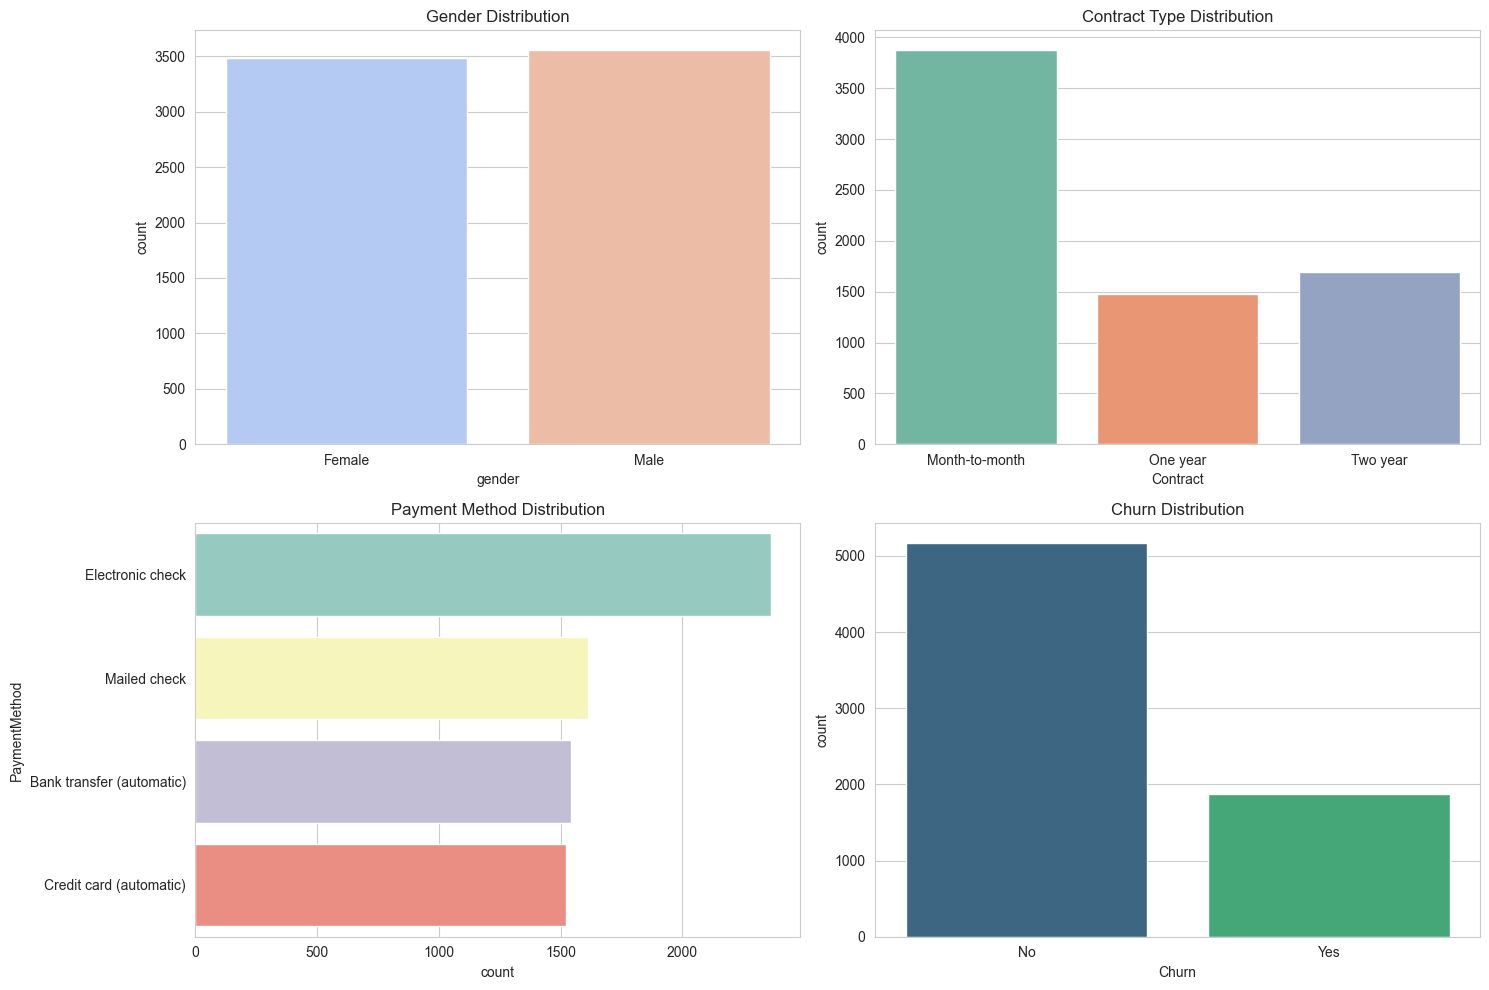

In [23]:
# Count plots for categorical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender distribution
sns.countplot(x=df["gender"], palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Gender Distribution")

# Contract type distribution
sns.countplot(x=df["Contract"], palette="Set2", ax=axes[0, 1])
axes[0, 1].set_title("Contract Type Distribution")

# Payment Method distribution
sns.countplot(y=df["PaymentMethod"], palette="Set3", ax=axes[1, 0])
axes[1, 0].set_title("Payment Method Distribution")

# Churn distribution
sns.countplot(x=df["Churn"], palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Churn Distribution")

plt.tight_layout()
plt.show()


# Categorical Feature Insights
* Gender: Nearly equal distribution (not a significant factor in churn).
* Contract Type: Most customers are on month-to-month contracts, which could be linked to higher churn.
* Payment Method: Electronic check is most common, followed by mailed check and automatic payments.
* Churn Distribution: More customers stay (No Churn), but a significant portion churns.

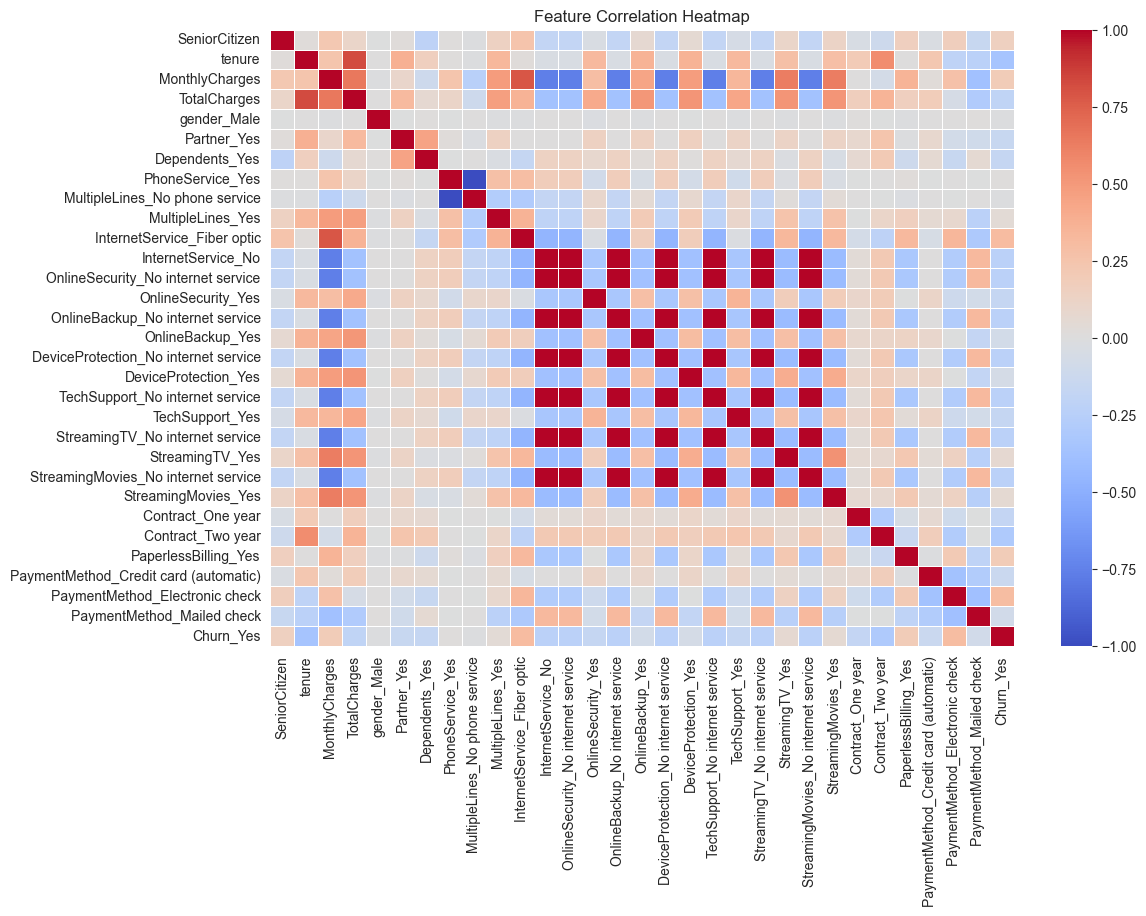

In [24]:
# Convert categorical variables to numerical for correlation analysis
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

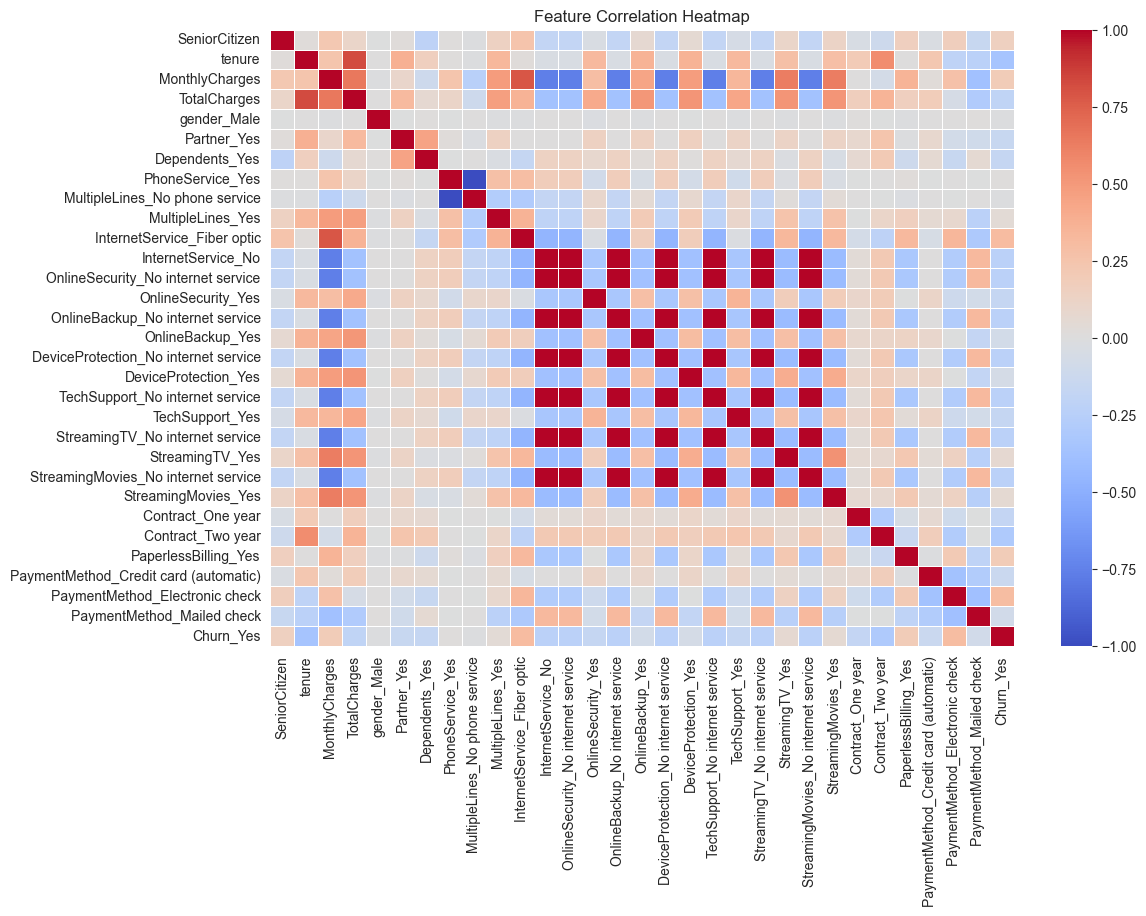

In [25]:
# Recompute correlation matrix and plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


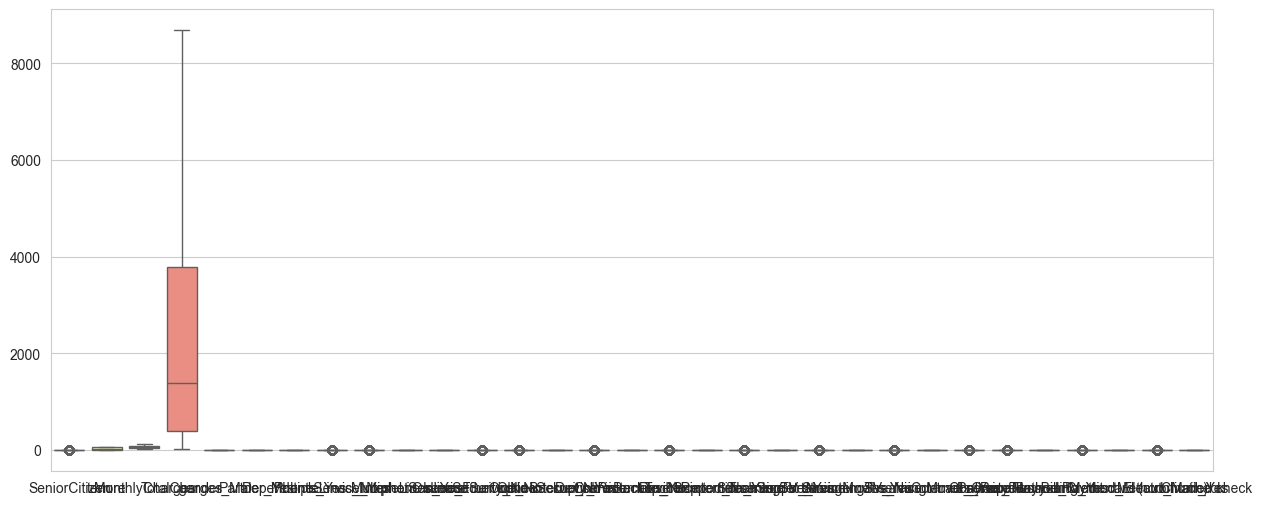

In [34]:
# Boxplot
plt.figure(figsize=(15,6))

sns.boxplot(data=df_encoded, palette="Set3")

plt.show()